# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 591


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?units=Imperial&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # pause for 1 sec using time.sleep() -- this avoids the Openweather API key from being disabled
        time.sleep(1)

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | cabedelo
Processing Record 3 of Set 1 | malango
Processing Record 4 of Set 1 | port lincoln
Processing Record 5 of Set 1 | raychikhinsk
Processing Record 6 of Set 1 | invercargill
Processing Record 7 of Set 1 | saipan
Processing Record 8 of Set 1 | hobyo
Processing Record 9 of Set 1 | bethel
Processing Record 10 of Set 1 | port mathurin
Processing Record 11 of Set 1 | nova sintra
Processing Record 12 of Set 1 | east end
Processing Record 13 of Set 1 | malinyi
Processing Record 14 of Set 1 | tofol
Processing Record 15 of Set 1 | port blair
Processing Record 16 of Set 1 | zelenogorsk
Processing Record 17 of Set 1 | palermo
Processing Record 18 of Set 1 | whitehorse
Processing Record 19 of Set 1 | puerto natales
Processing Record 20 of Set 1 | gypsum
Processing Record 21 of Set 1 | longonjo
Processing Record 22 of Set 1 | nizhneudinsk
Processing Record 23 of Set

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [10]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,42.6001,-73.9662,25.21,76,21,9.91,US,1738719940
1,cabedelo,-6.9811,-34.8339,75.87,82,100,10.96,BR,1738720191
2,malango,-2.9627,119.9001,82.63,53,81,3.94,ID,1738720193
3,port lincoln,-34.7333,135.8667,68.86,59,8,16.40,AU,1738720195
4,raychikhinsk,49.7838,129.4121,-7.80,92,100,11.32,RU,1738720197


In [31]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [33]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,25.21,76,21,9.91,US,1738719940
1,cabedelo,-6.9811,-34.8339,75.87,82,100,10.96,BR,1738720191
2,malango,-2.9627,119.9001,82.63,53,81,3.94,ID,1738720193
3,port lincoln,-34.7333,135.8667,68.86,59,8,16.40,AU,1738720195
4,raychikhinsk,49.7838,129.4121,-7.80,92,100,11.32,RU,1738720197


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

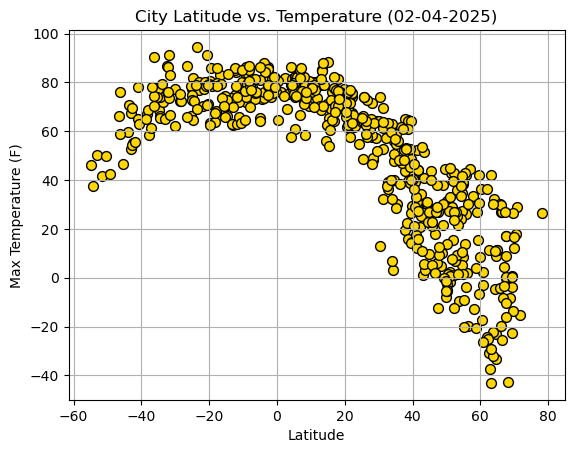

In [35]:
# Build scatter plot for latitude vs. temperature
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    color="gold",
    edgecolor="black",
    linewidths=1,
    marker="o",
    label="Cities",
    s=50
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Temperature (%s)" % time.strftime("%m-%d-%Y"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

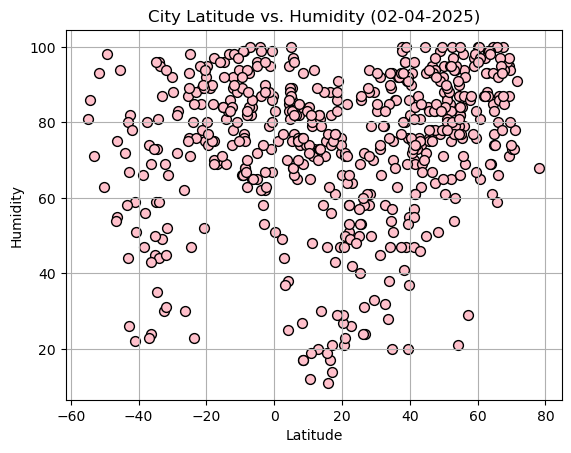

In [37]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Humidity"],
    color="pink",
    edgecolor="black",
    linewidths=1,
    marker="o",
    label="Cities",
    s=50
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%m-%d-%Y"))
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

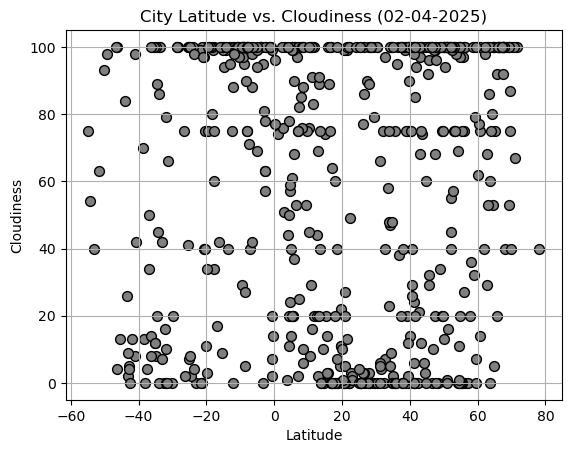

In [39]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    color="grey",
    edgecolor="black",
    linewidths=1,
    marker="o",
    label="Cities",
    s=50
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%m-%d-%Y"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

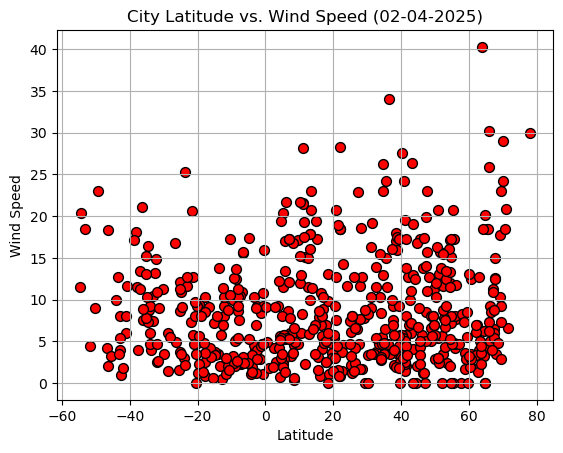

In [41]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Wind Speed"],
    color="red",
    edgecolor="black",
    linewidths=1,
    marker="o",
    label="Cities",
    s=50
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%m-%d-%Y"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [66]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates, color):

    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
  
    # Plot
    plt.scatter(x_values, y_values, color=color, edgecolors="black", s=50)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [68]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,25.21,76,21,9.91,US,1738719940
4,raychikhinsk,49.7838,129.4121,-7.80,92,100,11.32,RU,1738720197
6,saipan,15.1355,145.7010,88.50,75,20,17.27,MP,1738720202
7,hobyo,5.3505,48.5268,74.08,82,61,20.36,SO,1738720204
8,bethel,41.3712,-73.4140,30.56,57,24,1.99,US,1738720206


In [70]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,cabedelo,-6.9811,-34.8339,75.87,82,100,10.96,BR,1738720191
2,malango,-2.9627,119.9001,82.63,53,81,3.94,ID,1738720193
3,port lincoln,-34.7333,135.8667,68.86,59,8,16.40,AU,1738720195
5,invercargill,-46.4000,168.3500,76.01,55,100,1.99,NZ,1738720199
9,port mathurin,-19.6833,63.4167,80.60,80,3,9.48,MU,1738720208


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.742724639058024


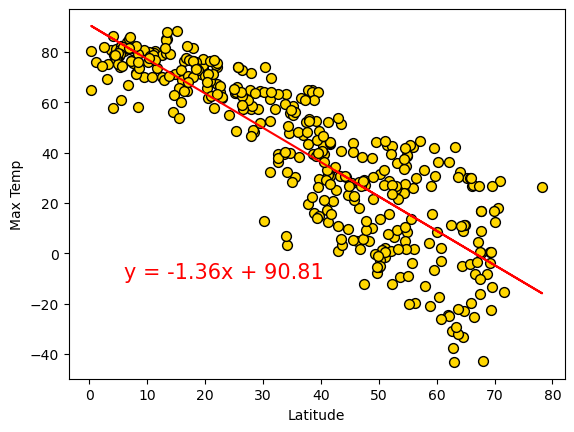

In [73]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (6,-10), "gold")

The r-value is: 0.3035099323779416


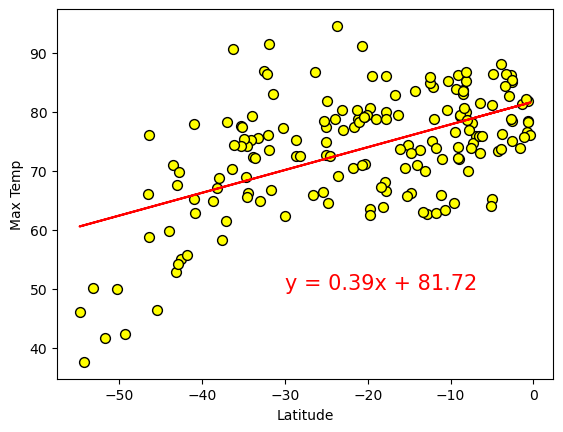

In [98]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (-30,50), "yellow")

**Discussion about the linear relationship:** The high r value indicates a strong positive correlation between latitude and max temperature. R values ~ 0.2 indicate that there is a weak positive correlation in the southern hemisphere (due to the season).

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.12600014472912158


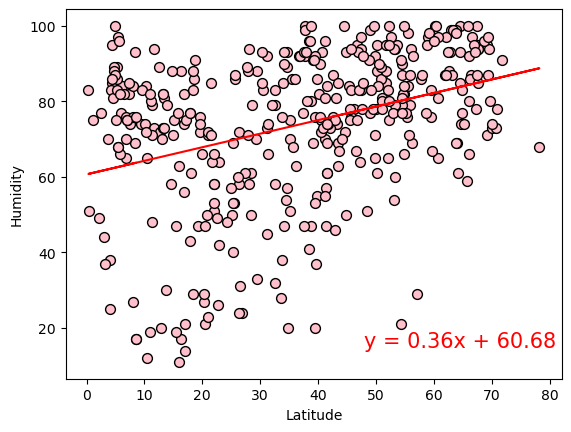

In [94]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (48,15), "pink")

The r-value is: 0.1197873680909266


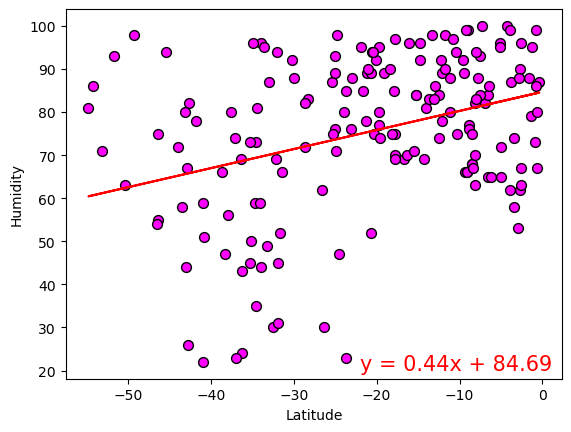

In [90]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (-22,20), "magenta")

**Discussion about the linear relationship:** The low r values indicate a weak to no relationship between humidity and latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.041316955201194105


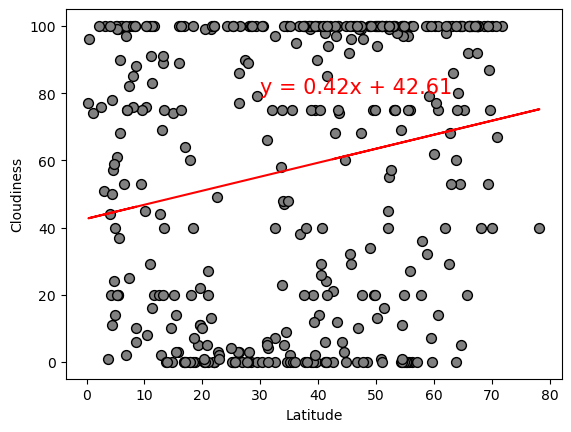

In [107]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (30,80), "grey")

The r-value is: 0.13015276982384313


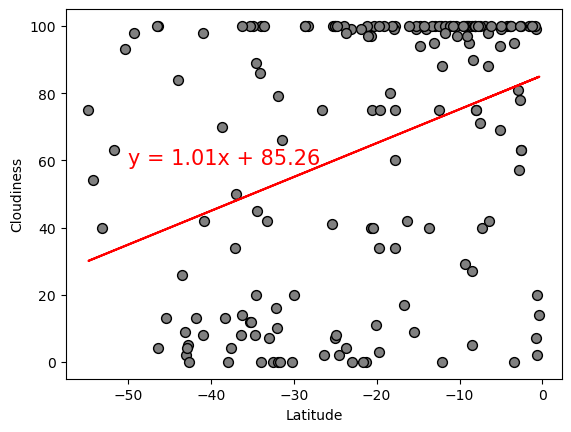

In [133]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (-50,59), "grey")

**Discussion about the linear relationship:** The low r values indicate a weak positive relationship between latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0035870393688098973


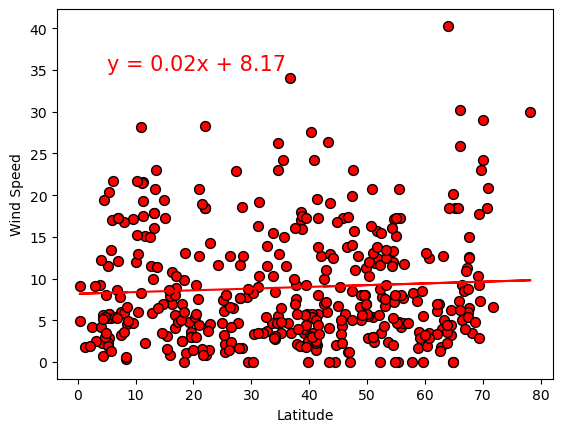

In [140]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (5,35), "red")

The r-value is: 0.0655063875178715


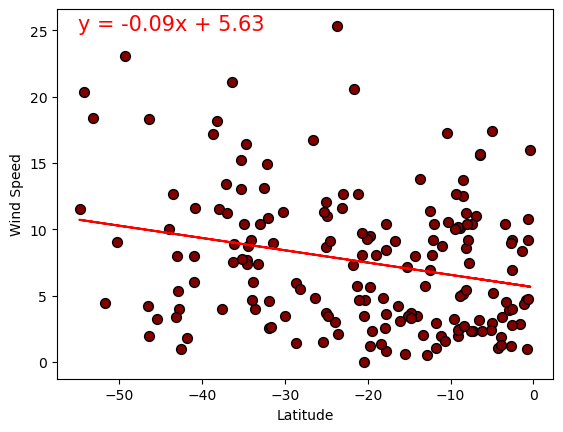

In [150]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (-55,25), "maroon")

**Discussion about the linear relationship:** The low r values indicate that there is no real relationship between wind speed and latitude.